In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit

# Saunders function
def saunders_function(L, alpha, sigma, L_star, phi_star):
    return phi_star * (L / L_star) ** (1-alpha) * np.exp(-1 / (2 * sigma ** 2) * (np.log10(1 + (L / L_star)))**2)

# Saunders function
def int_saunders_function(L, alpha, sigma, L_star, phi_star):
    return (phi_star / (np.log(10))) * (L / L_star) ** (1-alpha) * np.exp(-1 / (2 * sigma ** 2) * (np.log10(1 + (L / L_star)))**2)

# Redshift bins
redshift_bins = [[0.0, 0.3], 
                 [0.3, 0.45], 
                 [0.45, 0.6], 
                 [0.6, 0.8], 
                 [0.8, 1.0], 
                 [1.0, 1.2], 
                 [1.2, 1.7], 
                 [1.7, 2.0], 
                 [2.0, 2.5]]
z = np.mean(redshift_bins, axis=1)


# Rodighiero 
R_L_03 = [8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75] # 0 < z < 0.3
R_L_04 =                   [10.25, 10.75, 11.25, 11.75] # 0.3 < z < 0.45
R_L_06 =                          [10.75, 11.25, 11.75] # 0.45 < z < 0.6
R_L_08 =                          [10.75, 11.25, 11.75, 12.25, 12.75] # 0.6 < z < 0.8
R_L_10 =                                 [11.25, 11.75, 12.25, 12.75] # 0.8 < z < 1.0
R_L_12 =                                 [11.25, 11.75, 12.25, 12.75] # 1.0 < z < 1.2
R_L_17 =                                        [11.75, 12.25, 12.75, 13.25] # 1.2 < z < 1.7
R_L_20 =                                        [11.75, 12.25, 12.75, 13.25] # 1.7 < z < 2
R_L_25 =                                               [12.25, 12.75, 13.25, 13.75] # 2 < z < 2.5
R_L = [R_L_03, R_L_04, R_L_06, R_L_08, R_L_10, R_L_12, R_L_17, R_L_20, R_L_25]

R_P_03 = [-1.67, -1.93, -2.17, -2.51, -2.90, -4.07, -4.61] # 0 < z < 0.3
R_P_04 =                      [-2.65, -2.56, -3.34, -4.52] # 0.3 < z < 0.45
R_P_06 =                             [-2.36, -2.89, -4.05] # 0.45 < z < 0.6
R_P_08 =                             [-2.72, -2.64, -3.72, -4.94, -5.7] # 0.6 < z < 0.8
R_P_10 =                                    [-2.64, -3.27, -4.54, -5.3] # 0.8 < z < 1.0
R_P_12 =                                    [-2.83, -3.05, -4.28, -5.6] # 1.0 < z < 1.2
R_P_17 =                                           [-2.97, -3.46, -4.4, -5.92] # 1.2 < z < 1.7
R_P_20 =                                           [-3.45, -3.54, -4.4, -5.61] # 1.7 < z < 2
R_P_25 =                                                  [-3.61, -4.4, -6.09, -6.15] # 2 < z < 2.5
R_P = [R_P_03, R_P_04, R_P_06, R_P_08, R_P_10, R_P_12, R_P_17, R_P_20, R_P_25]

# Parameters
alpha = [1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2]
sigma = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6]

### Function Fit

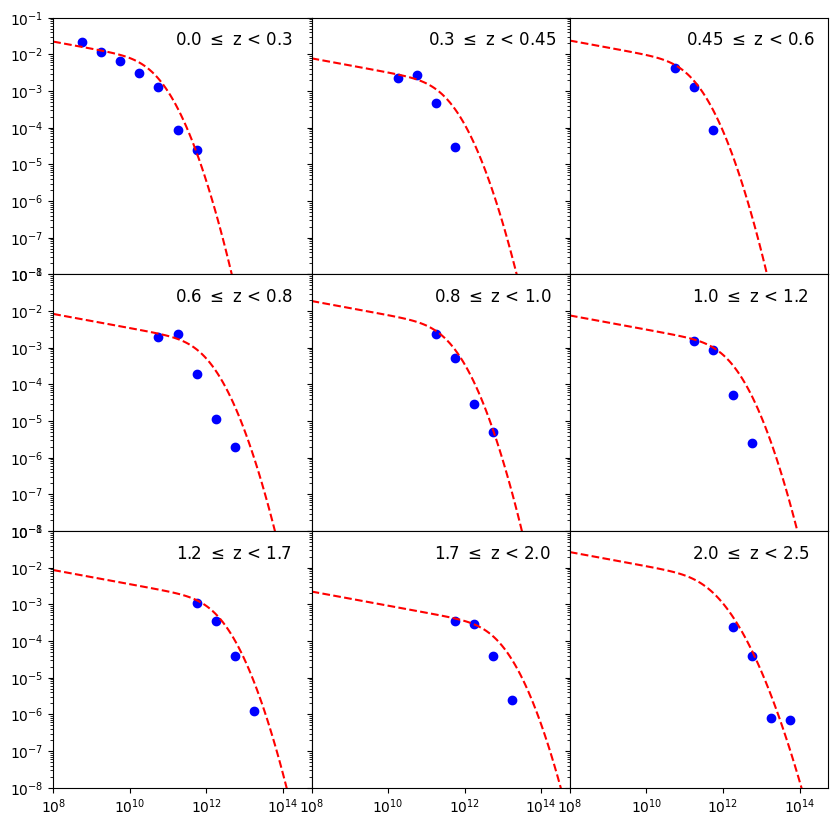

In [8]:
# Fitting Constraints
p0 = [10**(9.25), 10**(-2.05)]
bounds = ([10**(9.25), 1e-6], [10**(13), 10**(-2.05)])

# Plot
fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=True, sharey=True)
axes = axes.flatten()

lstar = []
pstar = []
for ax, a, s, L, P, (z_start, z_end) in zip(axes, alpha, sigma, R_L, R_P, redshift_bins):
    
    # Fiting
    func = lambda x, l_star, phi_star: saunders_function(x, a, s, l_star, phi_star)
    params = curve_fit(func, np.power(10, L), np.power(10, P), p0=p0, bounds=bounds, maxfev=100000)[0]
    
    # Plotting
    ax.set_title(f'{z_start} $\leq$ z < {z_end}', y=0.86, x=0.7)
    ax.scatter(np.power(10, L), np.power(10, P), color='blue')
    ax.plot(np.logspace(8, 14.75, 100), saunders_function(np.logspace(8, 14.5, 100), a, s, *params), color='red', linestyle='--')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(10**8, 10**14.75)
    ax.set_ylim(10**-8, 10**-1)
    
    # Save Parameters
    lstar.append(np.log10(params[0]))
    pstar.append(np.log10(params[1]))

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

Difference --- [1.35 1.13 0.97 1.05 0.86 0.63 0.85 0.62 1.26]
Average Difference --- 0.97


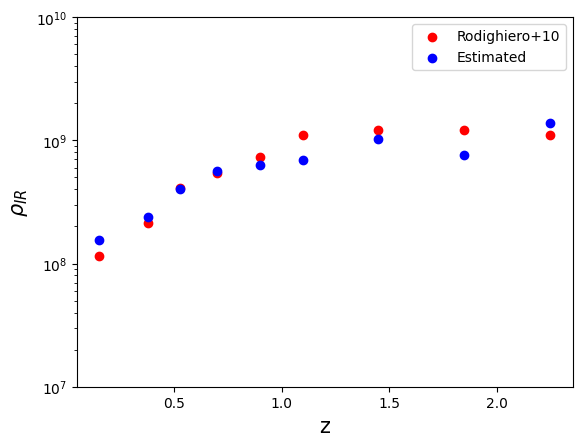

In [9]:
lower_bounds = np.power(10.0, np.arange(0, 32, 2)).tolist()
lower_bounds[0] = 0
upper_bounds = lower_bounds[1:] + [np.inf]


density = []

# Loop over redshift bins
for a, s, ls, ps in zip(alpha, sigma, lstar, pstar): 
    bound_area = 0
    
    # Loop over bounds
    for u, l in zip(upper_bounds, lower_bounds): 
        bound_area += integrate.quad(int_saunders_function, l, u, args=(a, s, 10**ls, 10**ps))[0]
    
    # Save
    density.append(bound_area)
    
# density = []
# for a, s, ls, ps, rl in zip(alpha, sigma, lstar, pstar, R_L): 
#     bound_area = integrate.quad(saunders_function, 10**rl[0], 10**rl[-1], args=(a, s, 10**ls, 10**ps))[0]
#     density.append(bound_area)
    
rod_sfrd = [114504756, 211935255, 412072148, 540281778, 726043374, 1103521372, 1202856733, 1217759418, 1103521372]
plt.scatter(z, rod_sfrd, color='red', label='Rodighiero+10')

diff = np.array(density) / np.array(rod_sfrd)
print(f'Difference --- {np.round(diff,2)}')
print(f'Average Difference --- {np.round(np.mean(diff),2)}')
    
plt.scatter(z, density, color='blue', label='Estimated')
plt.ylabel(r'$\rho_{IR}$', fontsize=15)
plt.xlabel('z', fontsize=15)
plt.yscale('log')
plt.ylim(10**7, 10**10)
plt.legend()
plt.show()